In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_model.csv')

In [3]:
df.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [4]:
df.head()

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,0,0,0,0,1,2,0,0,0,0,0,0.0,1,1,1,0.758426,-0.278080,0.286083
1,0,1,0,2,1,0,0,0,0,0,2,0.0,1,2,1,1.613592,-0.873018,0.213067
2,0,1,0,1,0,0,2,0,0,0,2,0.0,1,0,1,-0.911184,0.692433,-0.646863
3,1,1,0,0,1,2,0,0,0,0,0,0.0,1,0,1,-0.829739,-1.486236,-0.888808
4,0,0,0,1,0,0,0,0,0,0,0,0.0,1,3,1,0.391927,0.057611,0.212957


In [5]:
X = df.drop(['Churn'],axis = 1)
y = df.loc[:,'Churn']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 8)

In [8]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [9]:
model_params = {'criterion' : ['gini','entropy'],
                'max_depth': [1,2,3,4,5,6,7,8,9,None]}

In [10]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(dt,model_params,cv = 10)
search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, None]})

In [11]:
search.best_params_

{'criterion': 'gini', 'max_depth': None}

In [12]:
dtree2 = DecisionTreeClassifier(criterion= 'gini', max_depth = None)

In [13]:
model = dtree2.fit(X_train,y_train)

In [14]:
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc,roc_auc_score

In [16]:
accuracy_score(y_pred,y_test)

0.8680521991300145

In [17]:
print(confusion_matrix(y_pred,y_test))

[[800  63]
 [210 996]]


In [18]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       863
           1       0.94      0.83      0.88      1206

    accuracy                           0.87      2069
   macro avg       0.87      0.88      0.87      2069
weighted avg       0.88      0.87      0.87      2069



In [19]:
roc_auc_score(y_pred,y_test)

0.8764347440088088

In [20]:
y_pred_prob = model.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])
roc_auc = auc(fpr,tpr)
roc_auc

0.8662945614674782

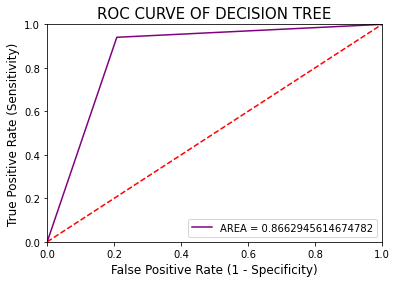

In [30]:
plt.plot(fpr,tpr,'purple',label = 'AREA = ' +str(roc_auc));
plt.legend(loc = 4);
plt.plot([0,1],[0,1],'--r');
plt.xlim([0,1]);
plt.ylim([0,1]);
plt.title('ROC CURVE OF DECISION TREE',size = 15);
plt.xlabel('False Positive Rate (1 - Specificity)',size = 12);
plt.ylabel('True Positive Rate (Sensitivity)',size = 12);